In [3]:
# Explorando los datos de uso de la tarjeta ciudadana del Ayuntamiento de Gijón. 

In [4]:
# Datos. Los datos los descargué del portal de datos abiertos del Ayuntamiento de Gijón
# https://transparencia.gijon.es/search/risp_dataset/page/1808-catalogo-de-datos?utf8=%E2%9C%93&search=tarjeta&search_sector=&search_format=&commit=Buscar&authenticity_token=3dfHiZinCPalI1qbrGMi9xN%2FcEXbwKTXCRcmQ6WRzZE%3D

In [2]:
!pwd

/mnt/c/Users/SErgio/OneDrive/python_projects/tarjeta_ciudadana


In [14]:
!ls

csv  original_data  tarjeta_ciudadana.ipynb


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
file='original_data/tc_usos_2017.csv'

In [22]:
datos_2017=pd.read_csv(file, encoding='latin-1')

# Sin especificar en encoding 'latin-1' daba el siguiente error:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 25: invalid continuation byte


In [35]:
datos_2017.describe(include='all')

,Fecha,Servicio,Instalacion,Usos
count,583,583,583,5.830000e+02
unique,12,9,52,NaN
top,2017-10-01,Aseos públicos,Cursos,NaN
freq,51,216,21,NaN
mean,NaN,NaN,NaN,2.561276e+04
std,NaN,NaN,NaN,1.453014e+05
min,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,1.585000e+02
50%,NaN,NaN,NaN,9.370000e+02
75%,NaN,NaN,NaN,3.232000e+03


In [39]:
datos_2017['Servicio'].value_counts()

Aseos públicos                     216
Reserva de instalaciones           196
Apertura contenedores orgánicos     48
10                                  34
Préstamos bibliotecas               24
Transporte                          24
010                                 17
Gijón Bici                          12
Inscripciones                       12
Name: Servicio, dtype: int64

In [44]:
datos_2017['Instalacion'].value_counts().head(10)

Cursos                                      21
El Rinconín                                 12
Playa de Poniente                           12
Infantiles                                  12
Nuevo Gijón                                 12
Complejo Deportivo El Llano - Contrueces    12
Paseo del Muro, escalera 3                  12
Antigua Pescadería                          12
Casa Consistorial                           12
Avda del Llano                              12
Name: Instalacion, dtype: int64

In [67]:
servicios = datos_2017.groupby(['Servicio'])['Usos'].sum().reset_index().sort_values(['Usos'], ascending=True)
print(servicios)

                          Servicio      Usos
0                              010      3268
1                               10      6992
4                       Gijón Bici     15097
5                    Inscripciones     92130
2  Apertura contenedores orgánicos    197771
7         Reserva de instalaciones    222017
6            Préstamos bibliotecas    250903
3                   Aseos públicos    315999
8                       Transporte  13828063


<BarContainer object of 9 artists>

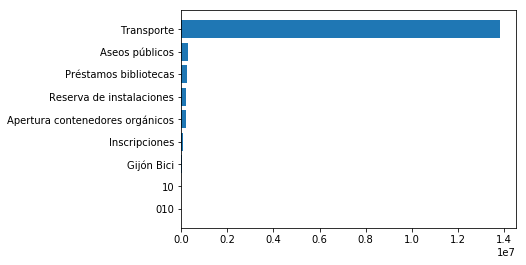

In [76]:
plt.barh(servicios['Servicio'], servicios['Usos'])

Como era de esperar la diferencia tan enorme entre los usos de 'Transporte' y el resto de categorías impide observar las diferencias entre el resto. Así que hacemos de nuevo el gráfico excluyendo el 'Servicio' 'Transporte'

<BarContainer object of 8 artists>

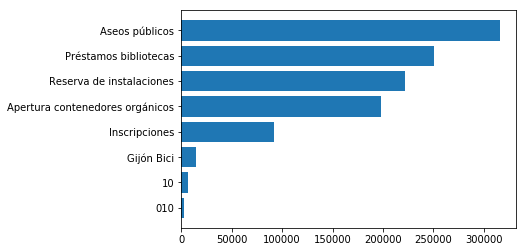

In [79]:
servicios_sin_tte = servicios.loc[servicios['Servicio'] != 'Transporte']
plt.barh(servicios_sin_tte['Servicio'], servicios_sin_tte['Usos'])